In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hackathon.csv')

In [3]:
df

,Set,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,train,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,No,No
1,train,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,No,No
2,train,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,No,No
3,train,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,No,No
4,train,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,train,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,Yes,No
12326,train,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,Yes,No
12327,train,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,Yes,No
12328,train,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,No,No


In [4]:
df['Revenue'] = df['Revenue'].map({'Yes': 1, 'No': 0})
df['Weekend'] = df['Weekend'].map({'Yes': 1, 'No': 0})

# Checking missing values

In [5]:
df.isnull().mean()

Set                        0.0
Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

# Exploring categorical variables

In [6]:
object_columns = [column for column in df.columns if df[column].dtype == np.dtype('object')]
object_columns

['Set', 'Month', 'VisitorType']

In [7]:
for column in object_columns:
    display(df[column].value_counts())

Set
train    9864
test     2466
Name: count, dtype: int64

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

<font color='red'><b>Question:</b></font> In which month, is "Revenue" most likely abd least likely to be positive, respectively?

In [8]:
df[['Month', 'Revenue']].groupby('Month').mean()

,Revenue
Month,
Aug,0.175520
Dec,0.125072
Feb,0.016304
Jul,0.152778
June,0.100694
Mar,0.100682
May,0.108502
Nov,0.253502
Oct,0.209472


<font color='red'><b>Question:</b></font> For which visitor type, is "Revenue" most likely abd least likely to be positive, respectively?

In [9]:
df[['VisitorType', 'Revenue']].groupby('VisitorType').mean()

,Revenue
VisitorType,
New_Visitor,0.249115
Other,0.188235
Returning_Visitor,0.139323


# Exploring numeric variables

In [10]:
numeric_columns = df.describe().columns[:-1]
numeric_columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend'],
      dtype='object')

<font color='red'><b>Question:</b></font> Is there any variable that shows good linear separability to differentiate "Revenue"? If so, which?

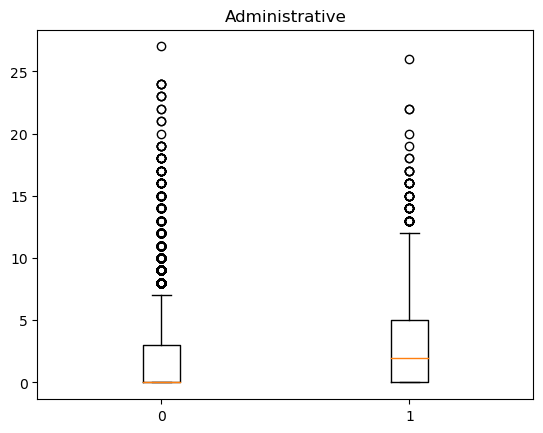

In [11]:
# We can make a conditional box plot for each variable against the label

column = numeric_columns[0]
labels = [0, 1]
y = [df[column][df['Revenue'] == label] for label in labels]

plt.boxplot(y, labels=labels)
plt.title(column)
plt.show()

In [12]:
# One-hot encoding

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
raw_column_names = ['Month', 'VisitorType']
raw_columns = df[raw_column_names]

In [15]:
enc = OneHotEncoder(drop='first')
enc.fit(raw_columns)
encoded_columns = enc.transform(raw_columns).toarray()
encoded_column_names = enc.get_feature_names_out()

In [16]:
df[encoded_column_names] = encoded_columns

# Prepare features and label
Use the first 10000 rows as the training set and the remaining rows as the test set

In [17]:
train_df = df[df['Set'] == 'train']
test_df = df[df['Set'] == 'test']

In [18]:
label = 'Revenue'
excluded_features = [label, 'Set'] + raw_column_names
features = [feature for feature in df.columns if feature not in excluded_features]

In [19]:
train_x = train_df[features]
train_y = train_df[label]

test_x = test_df[features]
test_y = test_df[label]

In [20]:
train_x

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

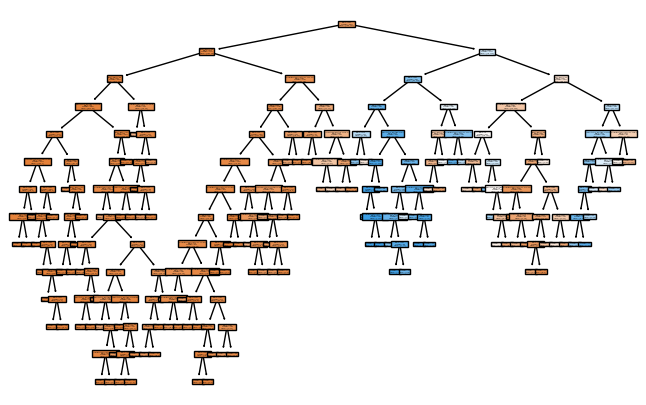

In [22]:
# Specify model parameters
criterion = 'gini'
min_samples_leaf = 40

# Build model
model = DecisionTreeClassifier(criterion=criterion, min_samples_leaf=min_samples_leaf)

# Fit model on training data
model.fit(train_x, train_y)

# Visualize the decision tree
feature_names = train_x.columns.tolist()
plt.figure(figsize=(8, 5))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

# k-nearest algorithm

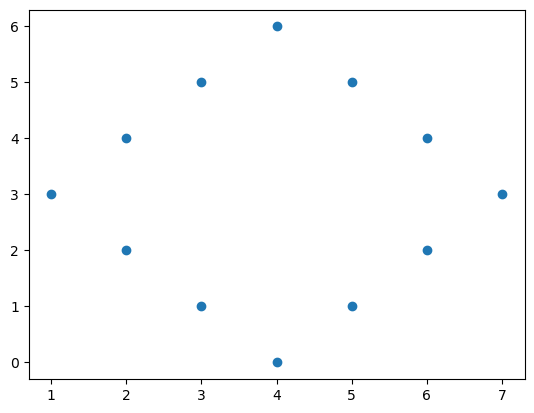

In [23]:
x = [1,2,3,4,5,6,7,6,5,4,3,2]
y = [3,4,5,6,5,4,3,2,1,0,1,2]
plt.scatter(x, y)